#### Контрольный вопрос: что такое порядок точности метода?
Ваш ответ: Порядком точности метода называется степень при наиболее значащем члене в выражение, получаемом для ошибки метода. Обычно ошибку метода можно оценить O(h^n) - n и будет называться порядком точности метода

#### Контрольный вопрос: какой порядок метода будет при численном дифференцировании по $N$ узлам и почему?

Ваш ответ: При дифференцирование по N узлам метод сводится к решение СЛАУ из N уравнений так, чтобы занулить 0 член и члены со 2 по N - 1. Тогда первый незанулившийся член - h^N, т.к. в методе мы делим разложение на h, то ошибку метода можно оценить как O(h^n-1). Порядок точности метода - n - 1

#### Контрольный вопрос: как называется матрица СЛАУ на коэффициенты метода неопределенных коэффицентов? Существует ли единственное решение системы и почему?

Ваш ответ: Такая матрица называется матрицей Вандермонта. Из курса линейной алгебры известно, что детерминант такой матрицы не равен 0, тогда по теореме Крамера решение СЛАУ с матрицей Вандермонта - единственно

In [1]:
#скрипт, который реализует алгоритм метода неопределенных коэффициентов
import numpy as np
import numpy.linalg as la

def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    # формируем матрицу системы в нужном виде
    A = np.fliplr(np.vander(v, v.size)).T 
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A,b)
    diff = 1/h*alpha.dot(u.T)
    return diff

p = 4 # порядок метода
a = np.pi/3
b = np.pi/2
h = (b-a)/p
print('h = ', h)
x = np.linspace(a, b, p+1)
u = np.sin(x) #ищем производную синуса

diff = get_diff(u, 0, p, h)
print('diff = ', diff)

h =  0.13089969389957473
diff =  0.49998238989252497


## Часть 1. Ошибка и обусловленность МНК

Задание:

1. написать скрипт, который строит график зависимости абсолютной ошибки от числа узлов. Используйте логарифмический масштаб, разумное число узлов. Обратите внимание, что сначала ошибка убывает, затем растет. Объясните почему.
2. Написать скрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности. Используйте логарифмический масштаб. Объясните поведение графика.

C:\Users\maslo\AppData\Local\Temp\ipykernel_7820\2559142106.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


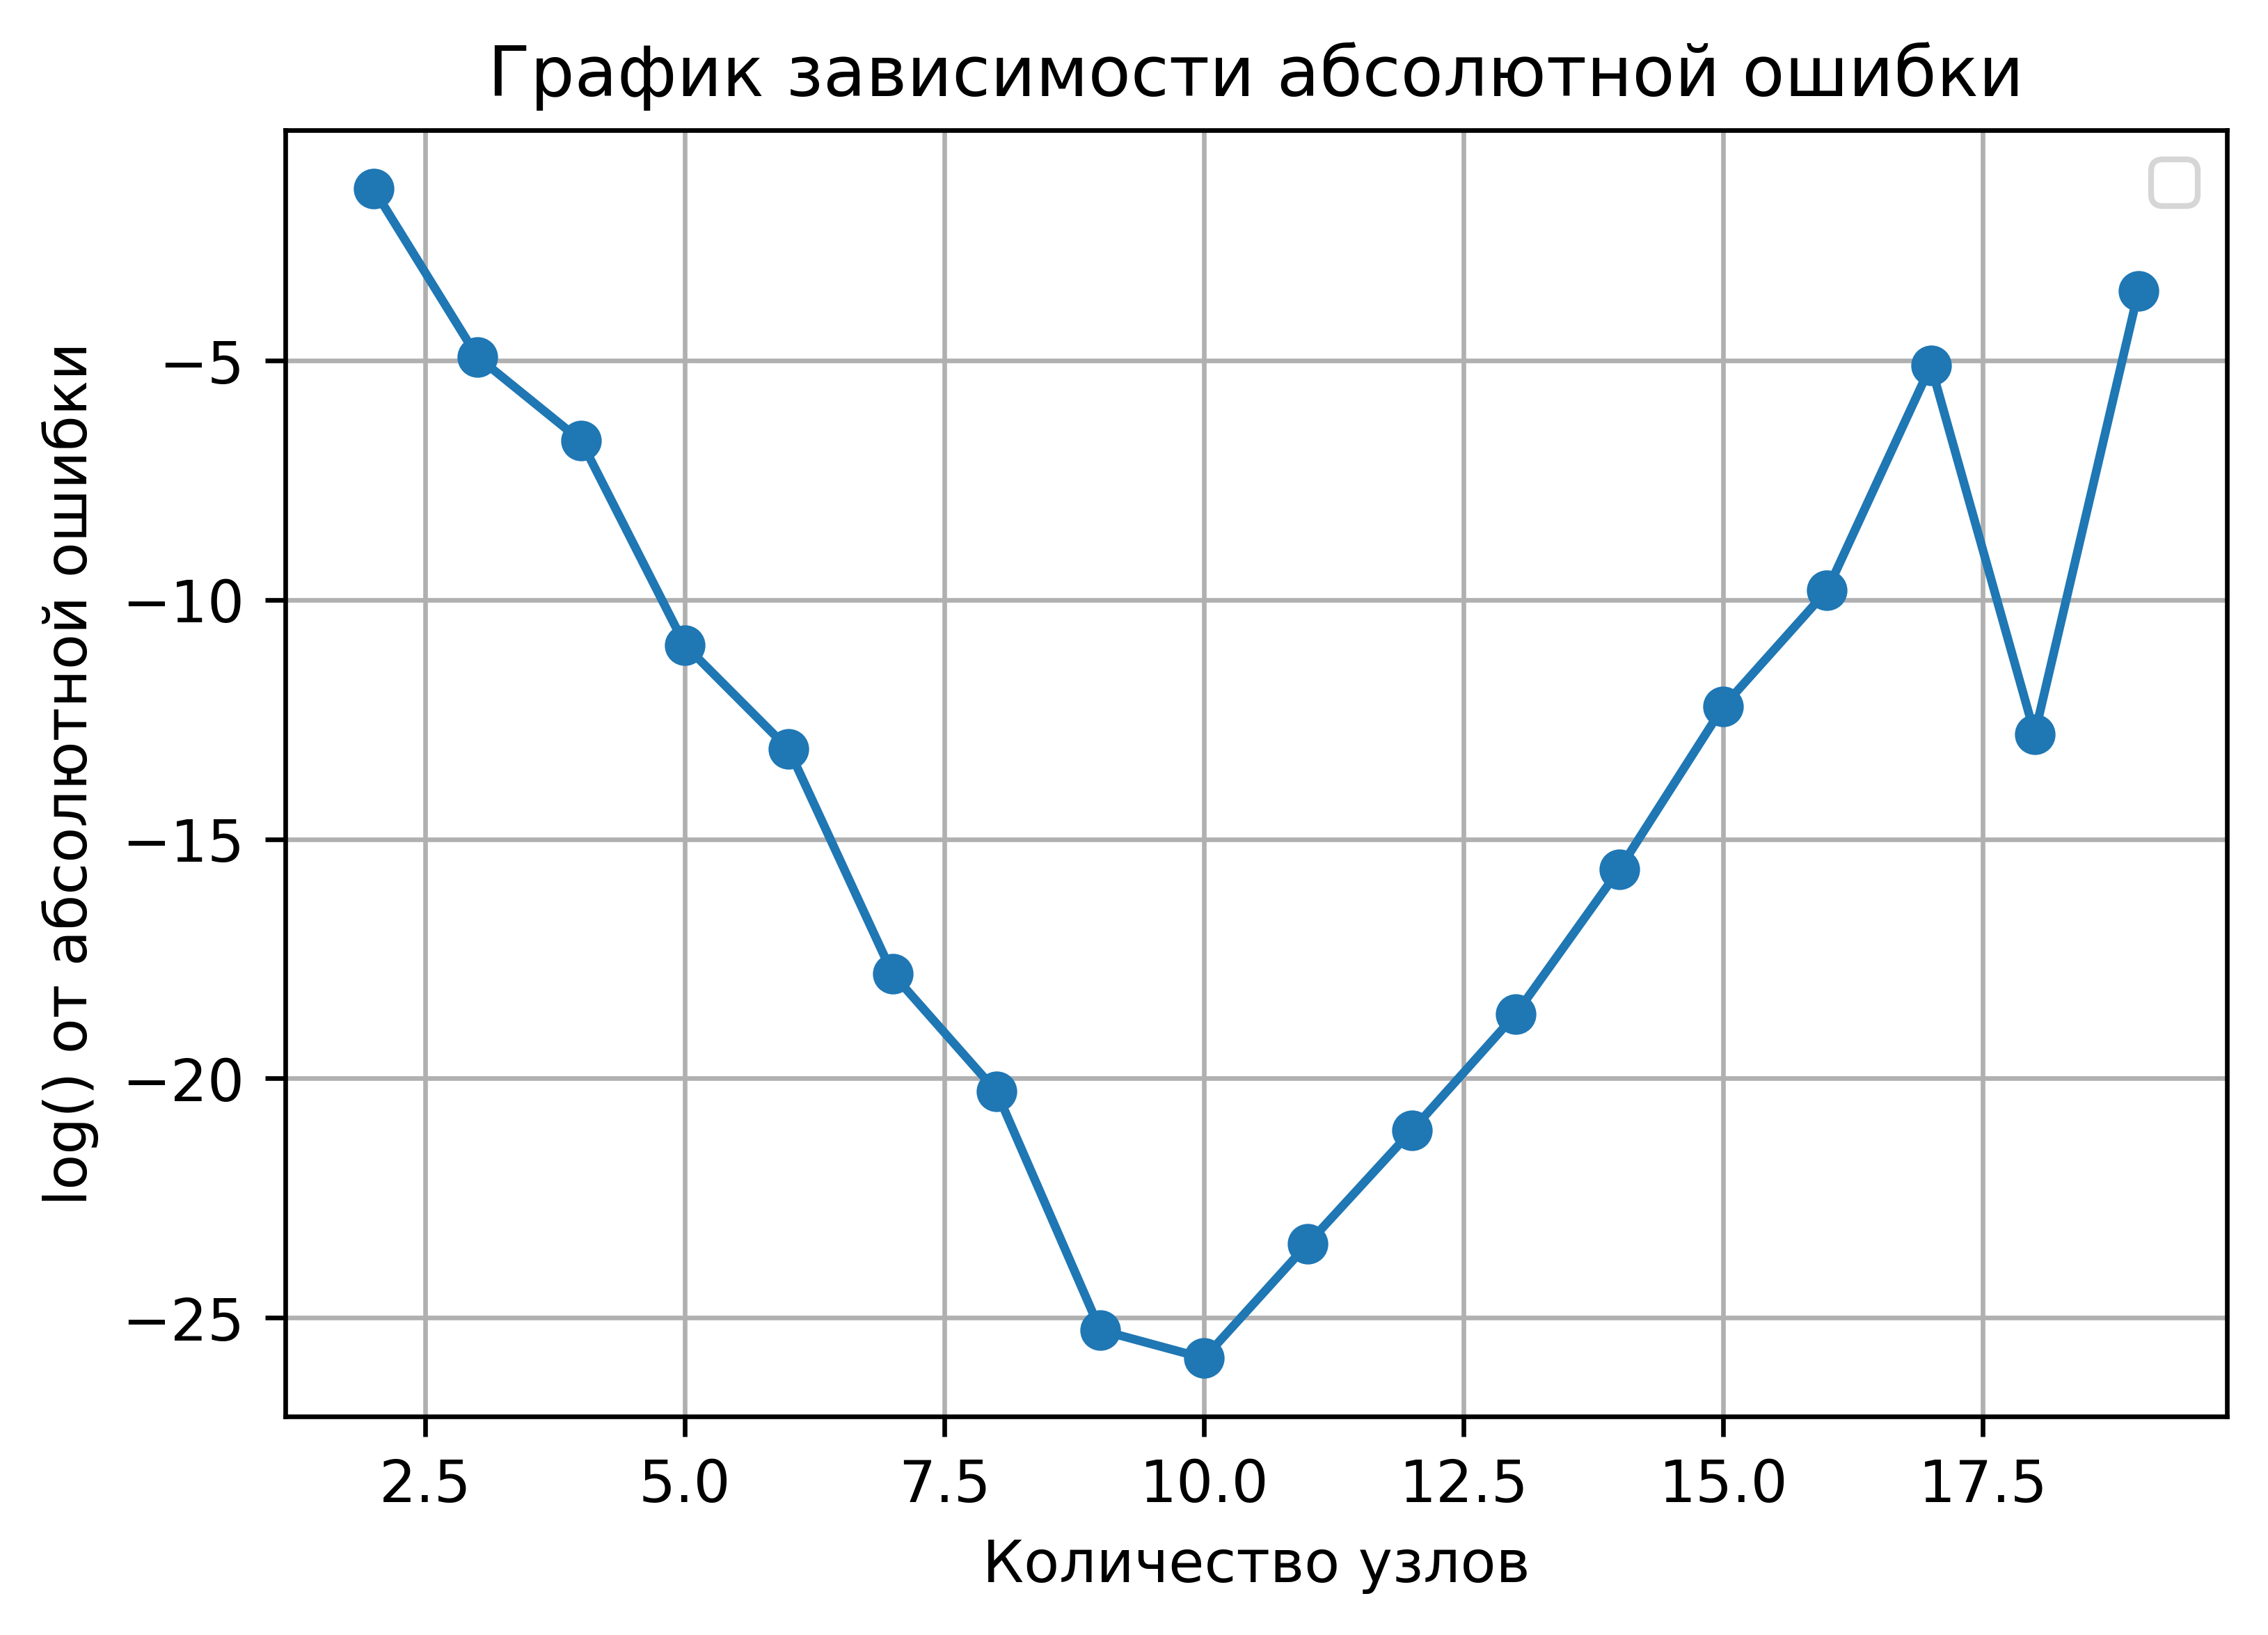

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

a = np.pi/3
b = np.pi/2
N = [i for i in range(2,20)] #количество узлов
Err = np.zeros(len(N)) #массив ошибок

for n in range(2, 20):
    p = n - 1
    h = (b - a) / p
    x = np.linspace(a, b, p+1)
    u = np.sin(x)

    Err[n - 2] = abs(get_diff(u, 0, p, h) - 0.5)    #ищем в точке a

plt.figure(figsize=(6, 4), dpi=600)
plt.grid()
plt.title("График зависимости абсолютной ошибки")
plt.xlabel("Количество узлов")
plt.ylabel("log() от абсолютной ошибки")

plt.plot(N, np.log(Err), marker='o')

plt.legend()
plt.savefig('1.1.png')

Изначально абсолютная ошибка убывает, т.к. основное влияние имеет ошибка метода, а она зависит как O(h^n-1). Однако при больших N начинает вносить больший вклад ошибка округления

C:\Users\maslo\AppData\Local\Temp\ipykernel_7820\3683574824.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


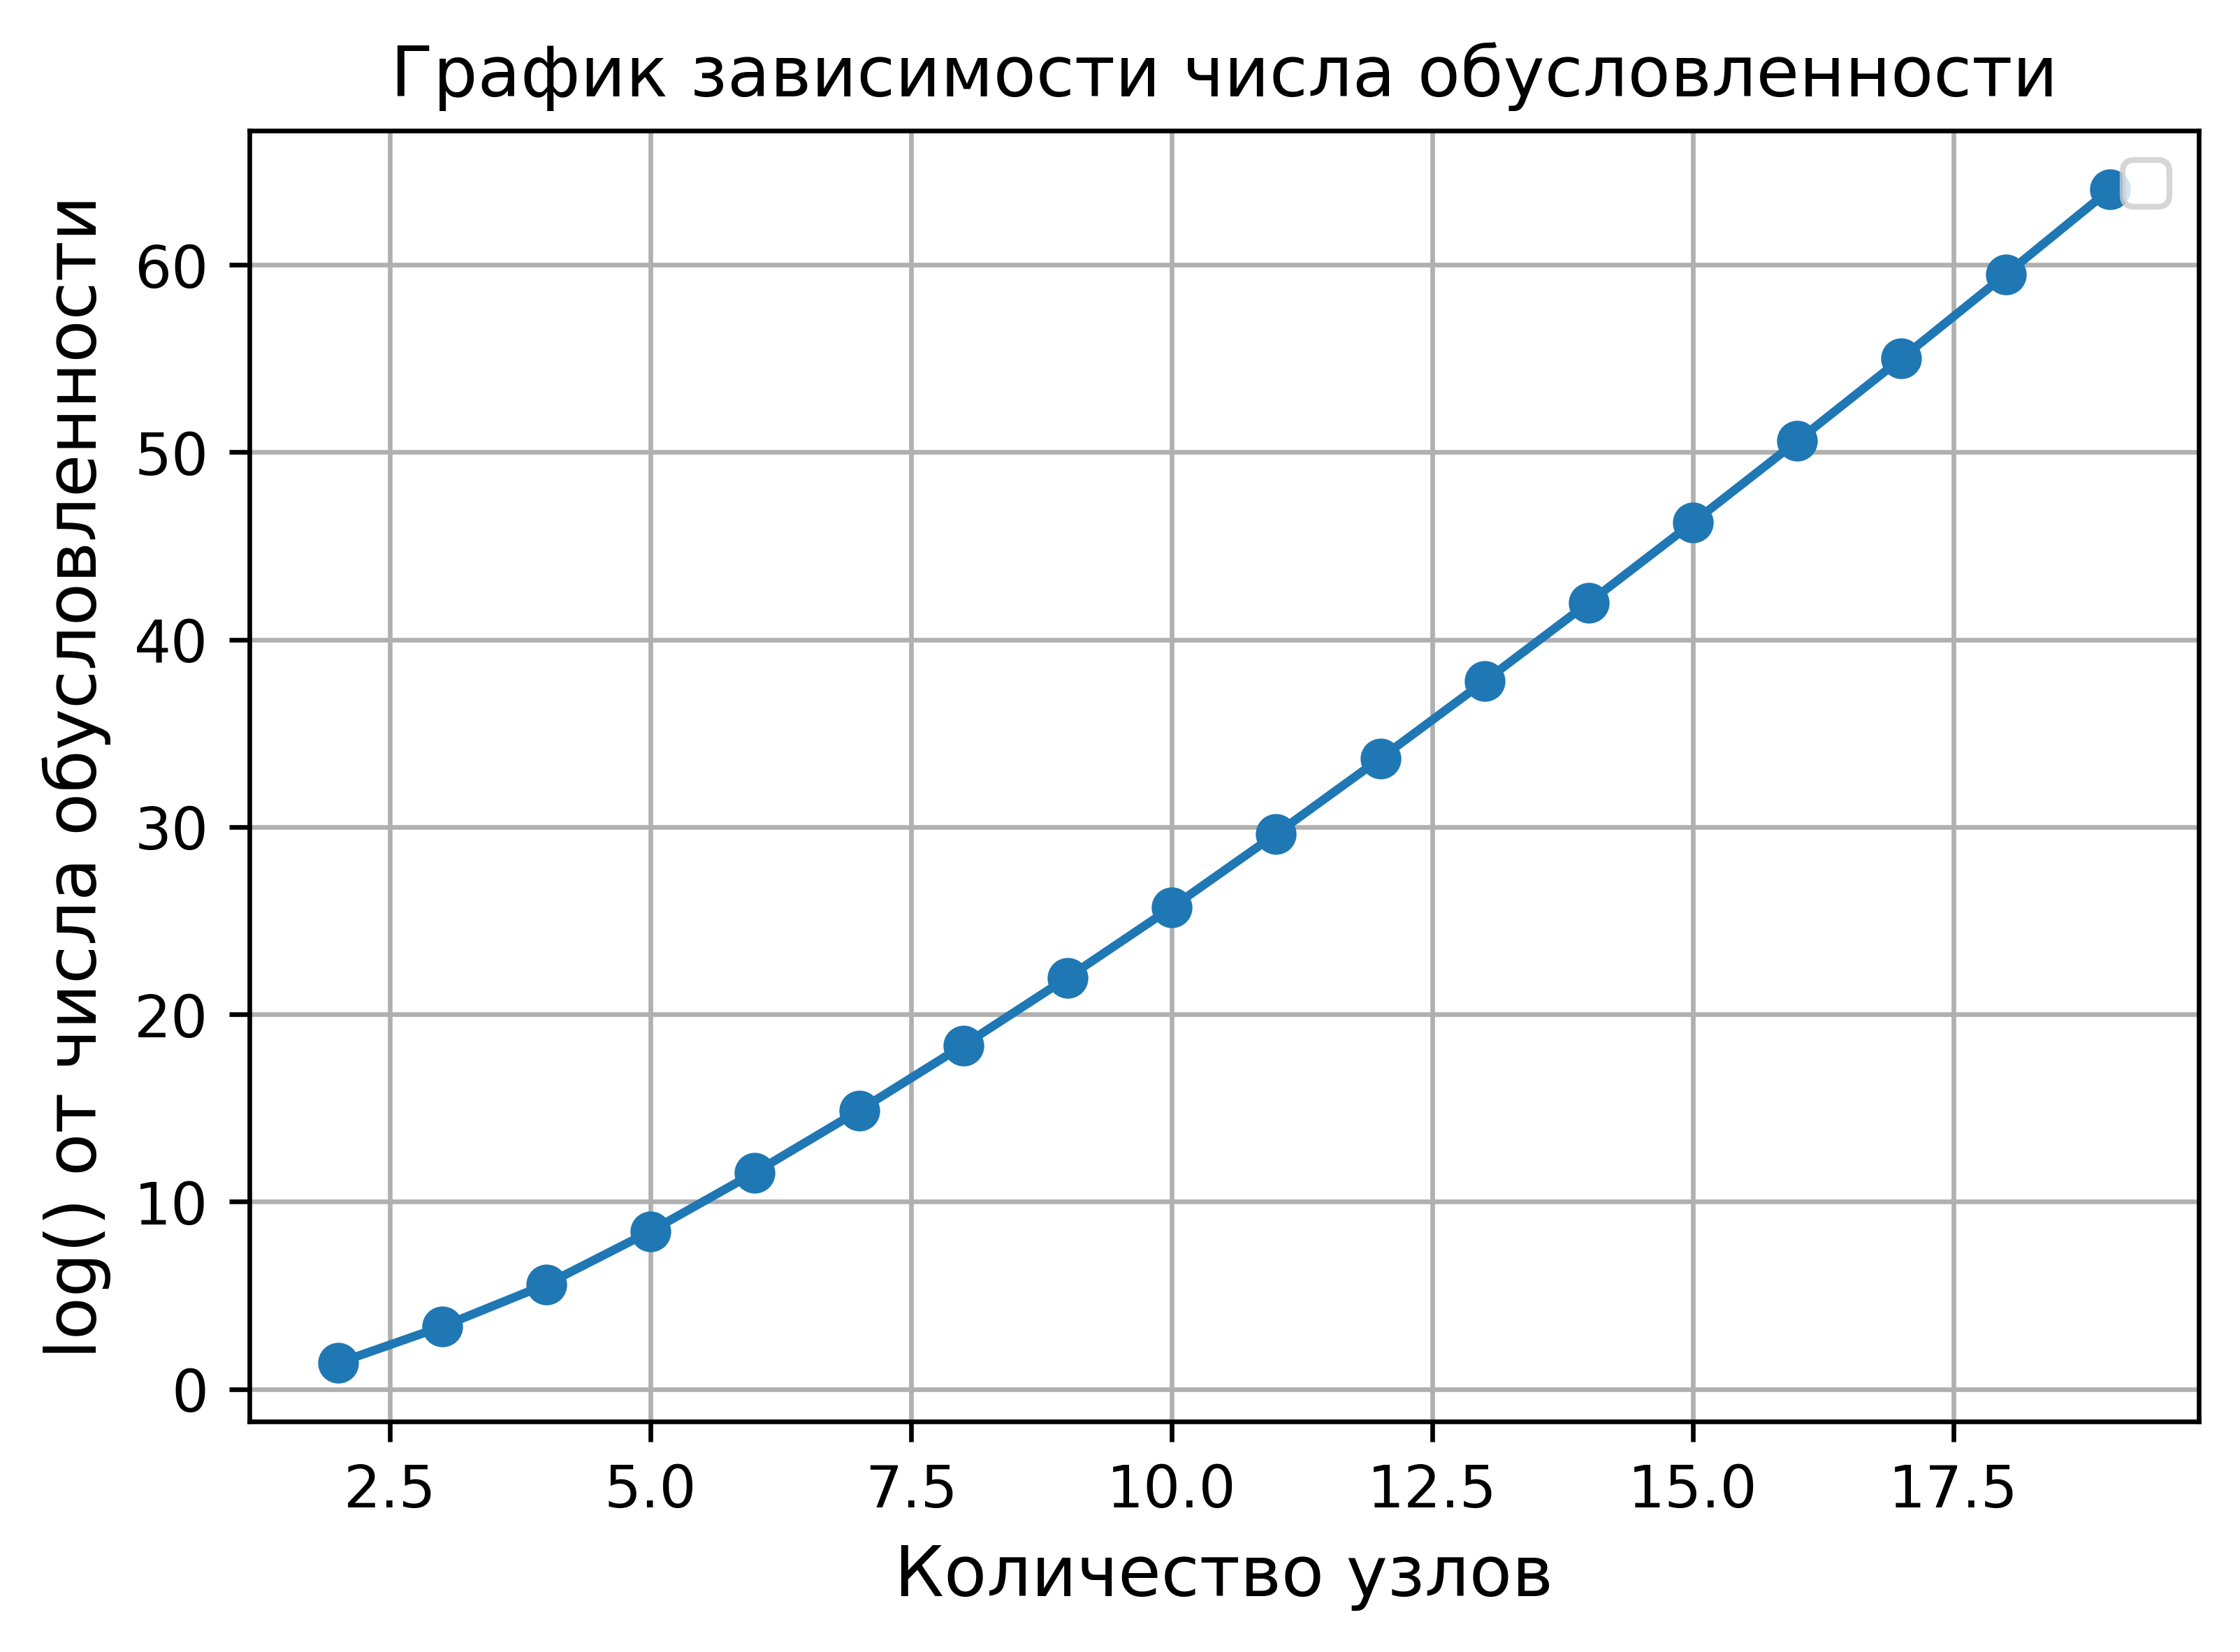

In [3]:
def get_mu(n):
    v = np.linspace(0, n - 1, n)
    A = np.vander(v, v.size)
    mu = la.norm(A, np.inf)*la.norm(la.inv(A), np.inf) # по inf норме
    return mu

N = [i for i in range(2, 20)]
Mu = np.zeros(len(N))
for n in range(2, 20):
    Mu[n - 20] = get_mu(n)

plt.figure(figsize=(6, 4), dpi=600)
plt.grid()
plt.title("График зависимости числа обусловленности")
plt.xlabel("Количество узлов", fontsize=12)
plt.ylabel("log() от числа обусловленности", fontsize=12)

plt.plot(N, np.log(Mu),  marker='o')

plt.legend()
plt.savefig('1.2.png')

Видно, что при количестве узлов более 5 число обусловленности имеет строго экспоненциальный рост, что говорит о том, что число обусловленности хорошо приближается функцией экспоненты. det(A) = П(x_i - x_j)

## Часть 2. Оценка порядка точности метода

Рассмотрим метод с порядком точности $p$. Тогда ошибка метода $\epsilon_h = Ch^p$, где $h$ - сеточный шаг. На сетке с двое меньшим шагом ошибка метода будет $\epsilon_{h/2} = C_1 \left(\frac{h}{2}\right)^p$. Если шаг h достаточно мелкий (ф-я меняется не очень сильно), то можно считать, что $C \approx C_1$. Тогда, исключив $C$ из первого равенства за счет второго, можно получить, что
$$
p = \log_2 \frac{\epsilon_h}{\epsilon_{h/2}}
$$

Задание:

3. написать скрипт, который численно будет определять порядок точности методов направленная разность и центральная разность. Построить график зависимости p от шага сетки в широком диапазоне значений h. На графике для h использовать логарифмический масштаб. Объяснить поведение графиков. Исследуйте при это области как слева, так и справа от плато. Почему положения плато отличаются для двух методов и находятся именно на своих уровнях (обосновать аналитически).

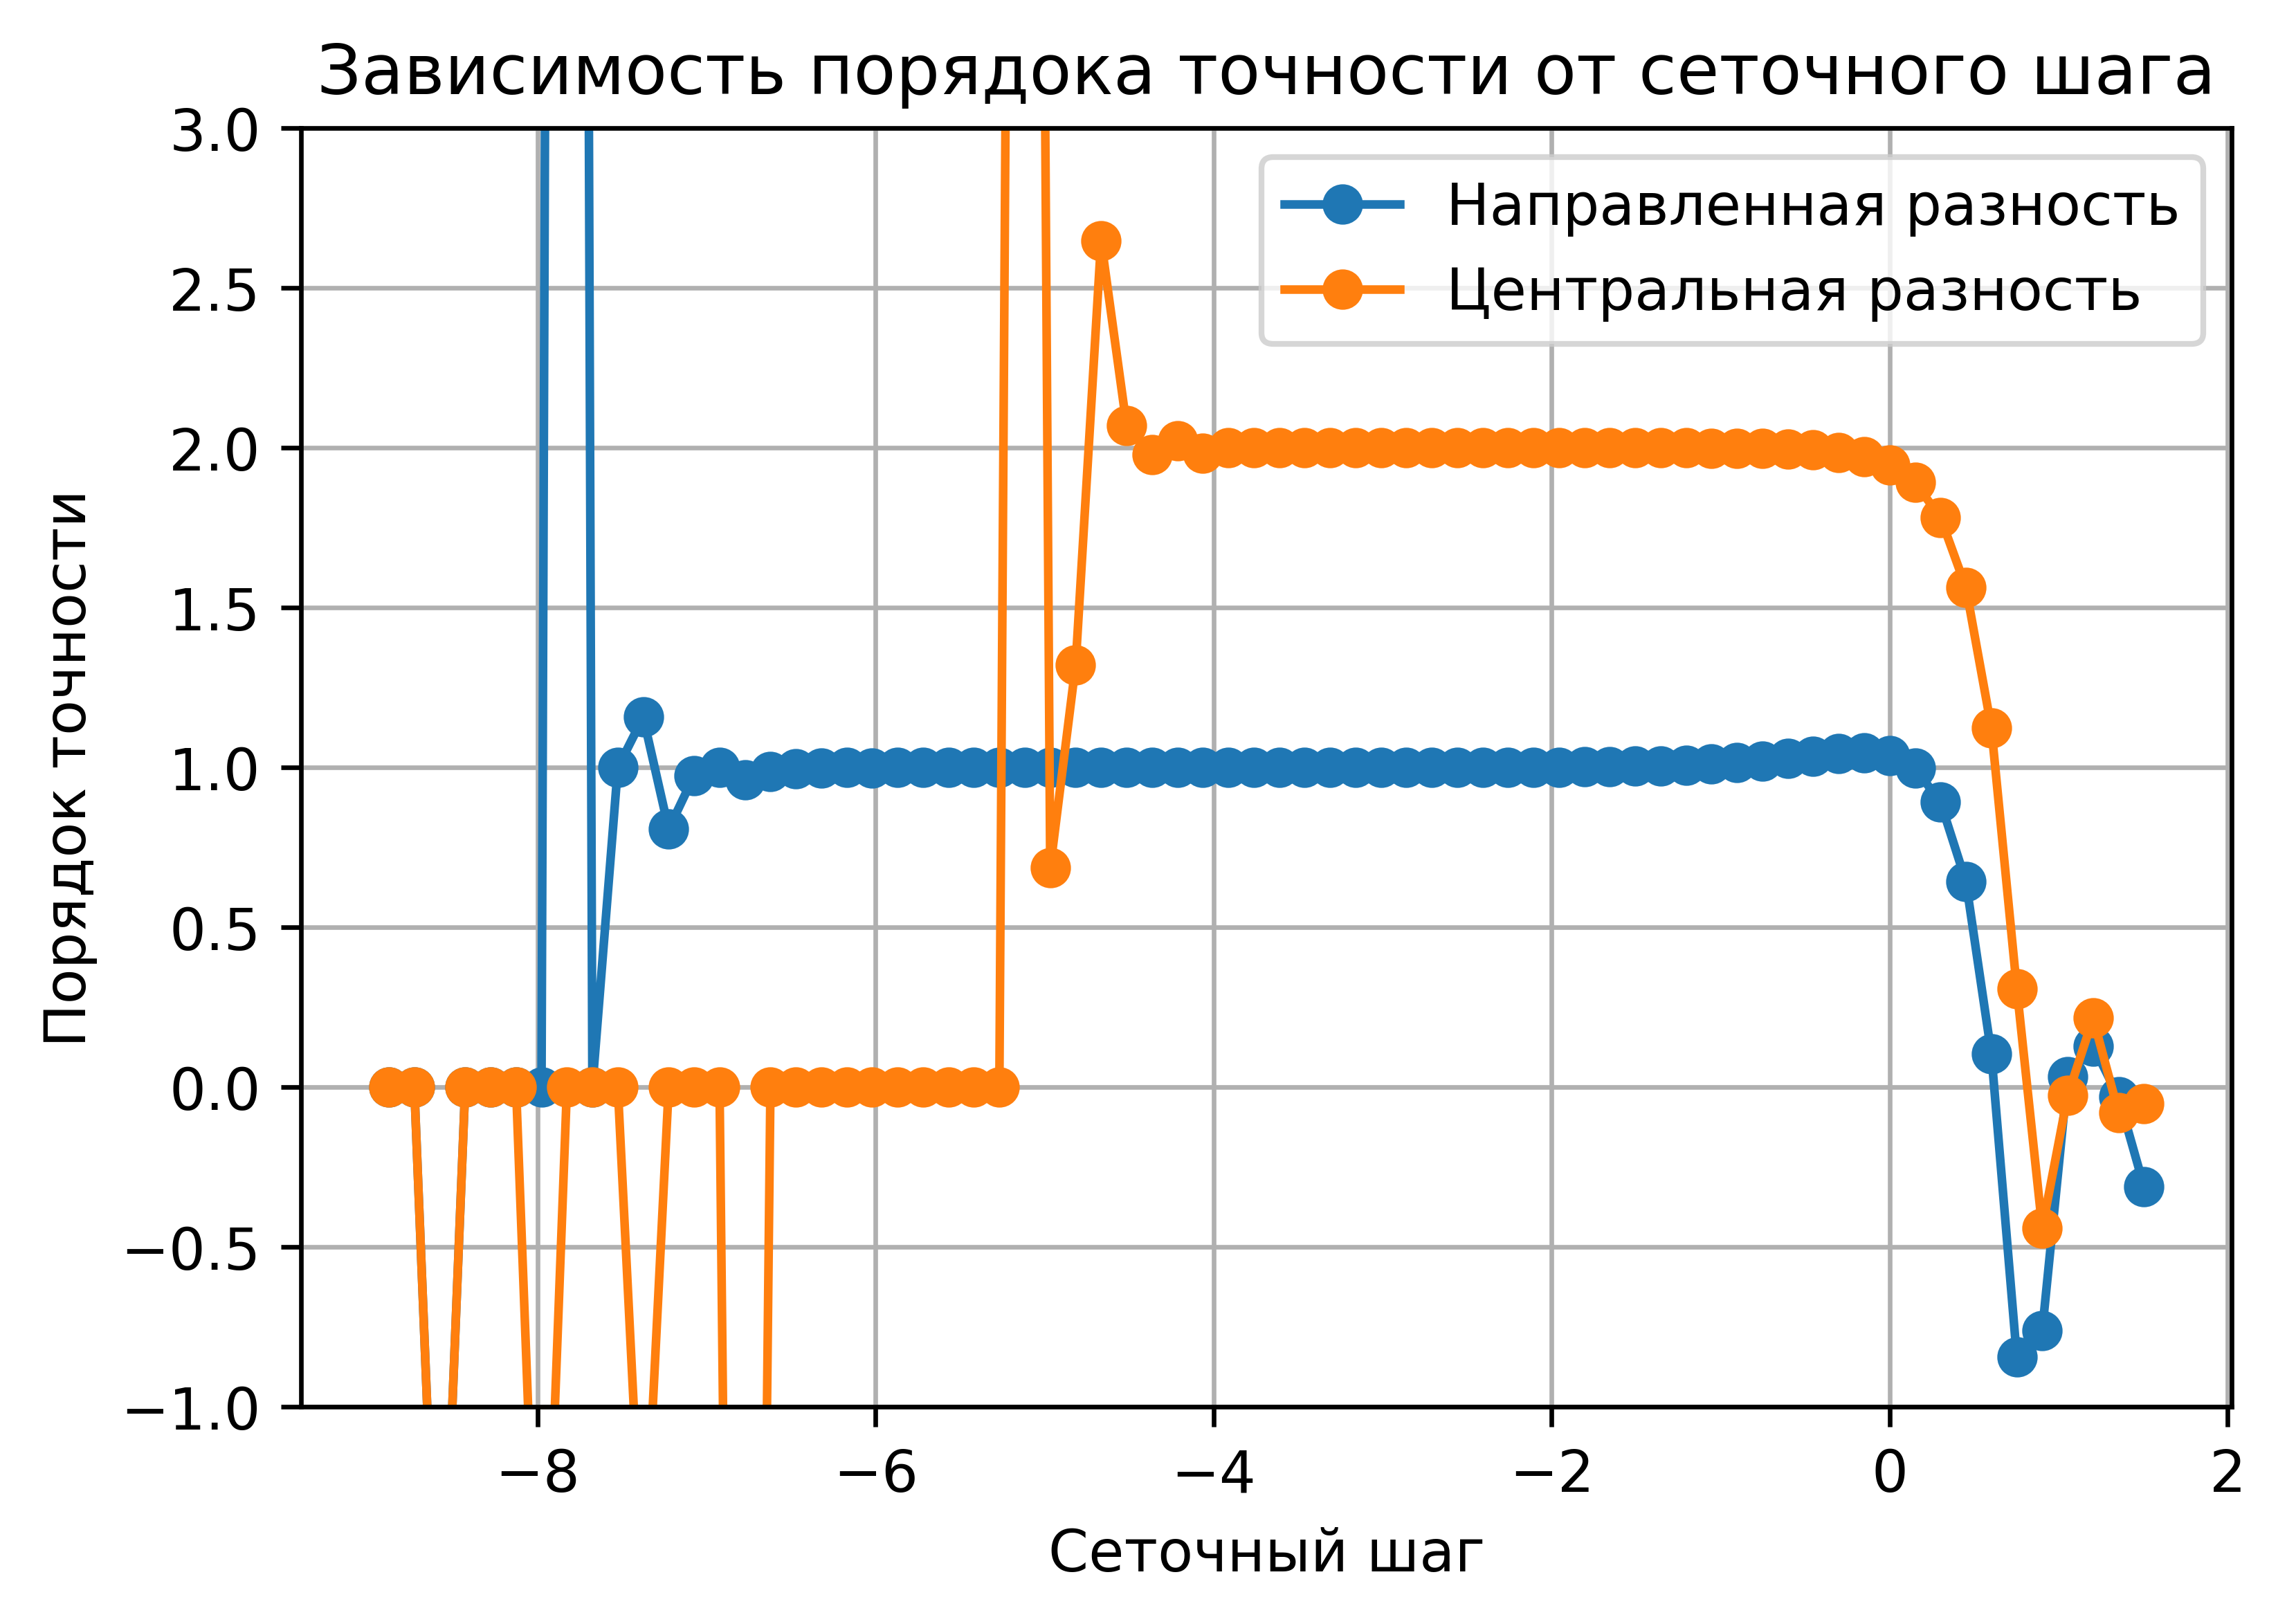

In [4]:
H = [np.sqrt(2)**(-n) for n in range(-10, 60)]
p_1 = np.zeros(len(H))
p_2 = np.zeros(len(H))

x = np.pi/3

for h in H:
    err_h = abs(((np.sin(x+h) - np.sin(x)) / h) - 0.5)
    err_h_2 = abs(((np.sin(x+h/2) - np.sin(x)) / (h/2)) - 0.5)
    p_1[H.index(h)] = np.log2(err_h / err_h_2)

    err_h = abs(((np.sin(x+h) - np.sin(x-h)) / (2*h)) - 0.5)
    err_h_2 = abs(((np.sin(x+h/2) - np.sin(x-h/2)) / (2*h/2)) - 0.5)
    p_2[H.index(h)] = np.log2(err_h / err_h_2)

plt.figure(figsize=(6, 4), dpi=600)
plt.grid()
plt.title("Зависимость порядока точности от сеточного шага")
plt.xlabel("Сеточный шаг")
plt.ylabel("Порядок точности")
plt.ylim([-1, 3])

plt.plot(np.log10(H), p_1, marker='o', label='Направленная разность')
plt.plot(np.log10(H), p_2, marker='o', label='Центральная разность')

plt.legend()
plt.savefig('2.png')

На обоих кривых видно плато, для которого верна оценка порядка точности (для направленной разности - 1 порядок точности, для центральной разности - 2 порядок точности, было доказано на семинаре). Справа от плато оценка становится не верна, т.к. не выполняется приблежение C = C_1 (при больших h функция меняется существенно). Слева от плато оценка не верна, потому что становится существенна ошибка округления. Плато для центральной разности начинается раньше, т.к. оно имеет второй порядок точности метода и ошибка округления начинает вносить вклад раньше, чем для навправленной разности.

## Часть 3. Дифференцирование с использованием полиномиальной интерполяции

Предложите вариант решения задачи численного дифференцирования на основании метода полиномиальной интерполяции по известным значениям функции. Реализуйте алгоритм, сравните его с МНК. Что общего у методов?

Будем использовать интерполяцию алгебраическими многочленами вида f(x) = a_0 + a_1*x + a_2*x^2 + ... + a_n-1*x^(n-1) на сетке из N узлов.
Подставим значения на узлах сетки в полином:

a_0 + a_1*x0 + a_2*x0^2 + ... + a_n-1*x0^(n-1) = f(x0)

...

a_0 + a_1*x_n-1 + a_2*x_n-1_^2 + ... + a_n-1*x_n-1_^(n-1) = f(x_n-1)

Коэффициенты данного полинома находятся путём решения СЛАУ с матрицей A - матрицей Вандермонта.

Тогда производная f'(x_i) = a_1 + 2*a_2*x_i + ... + (n-1)*a_n-1*x_i^(n-2).
Заметим, что в данном методе мы не делим на малый коэффициент h, в следствие чего ошибка округления не будет влиять при больших N.

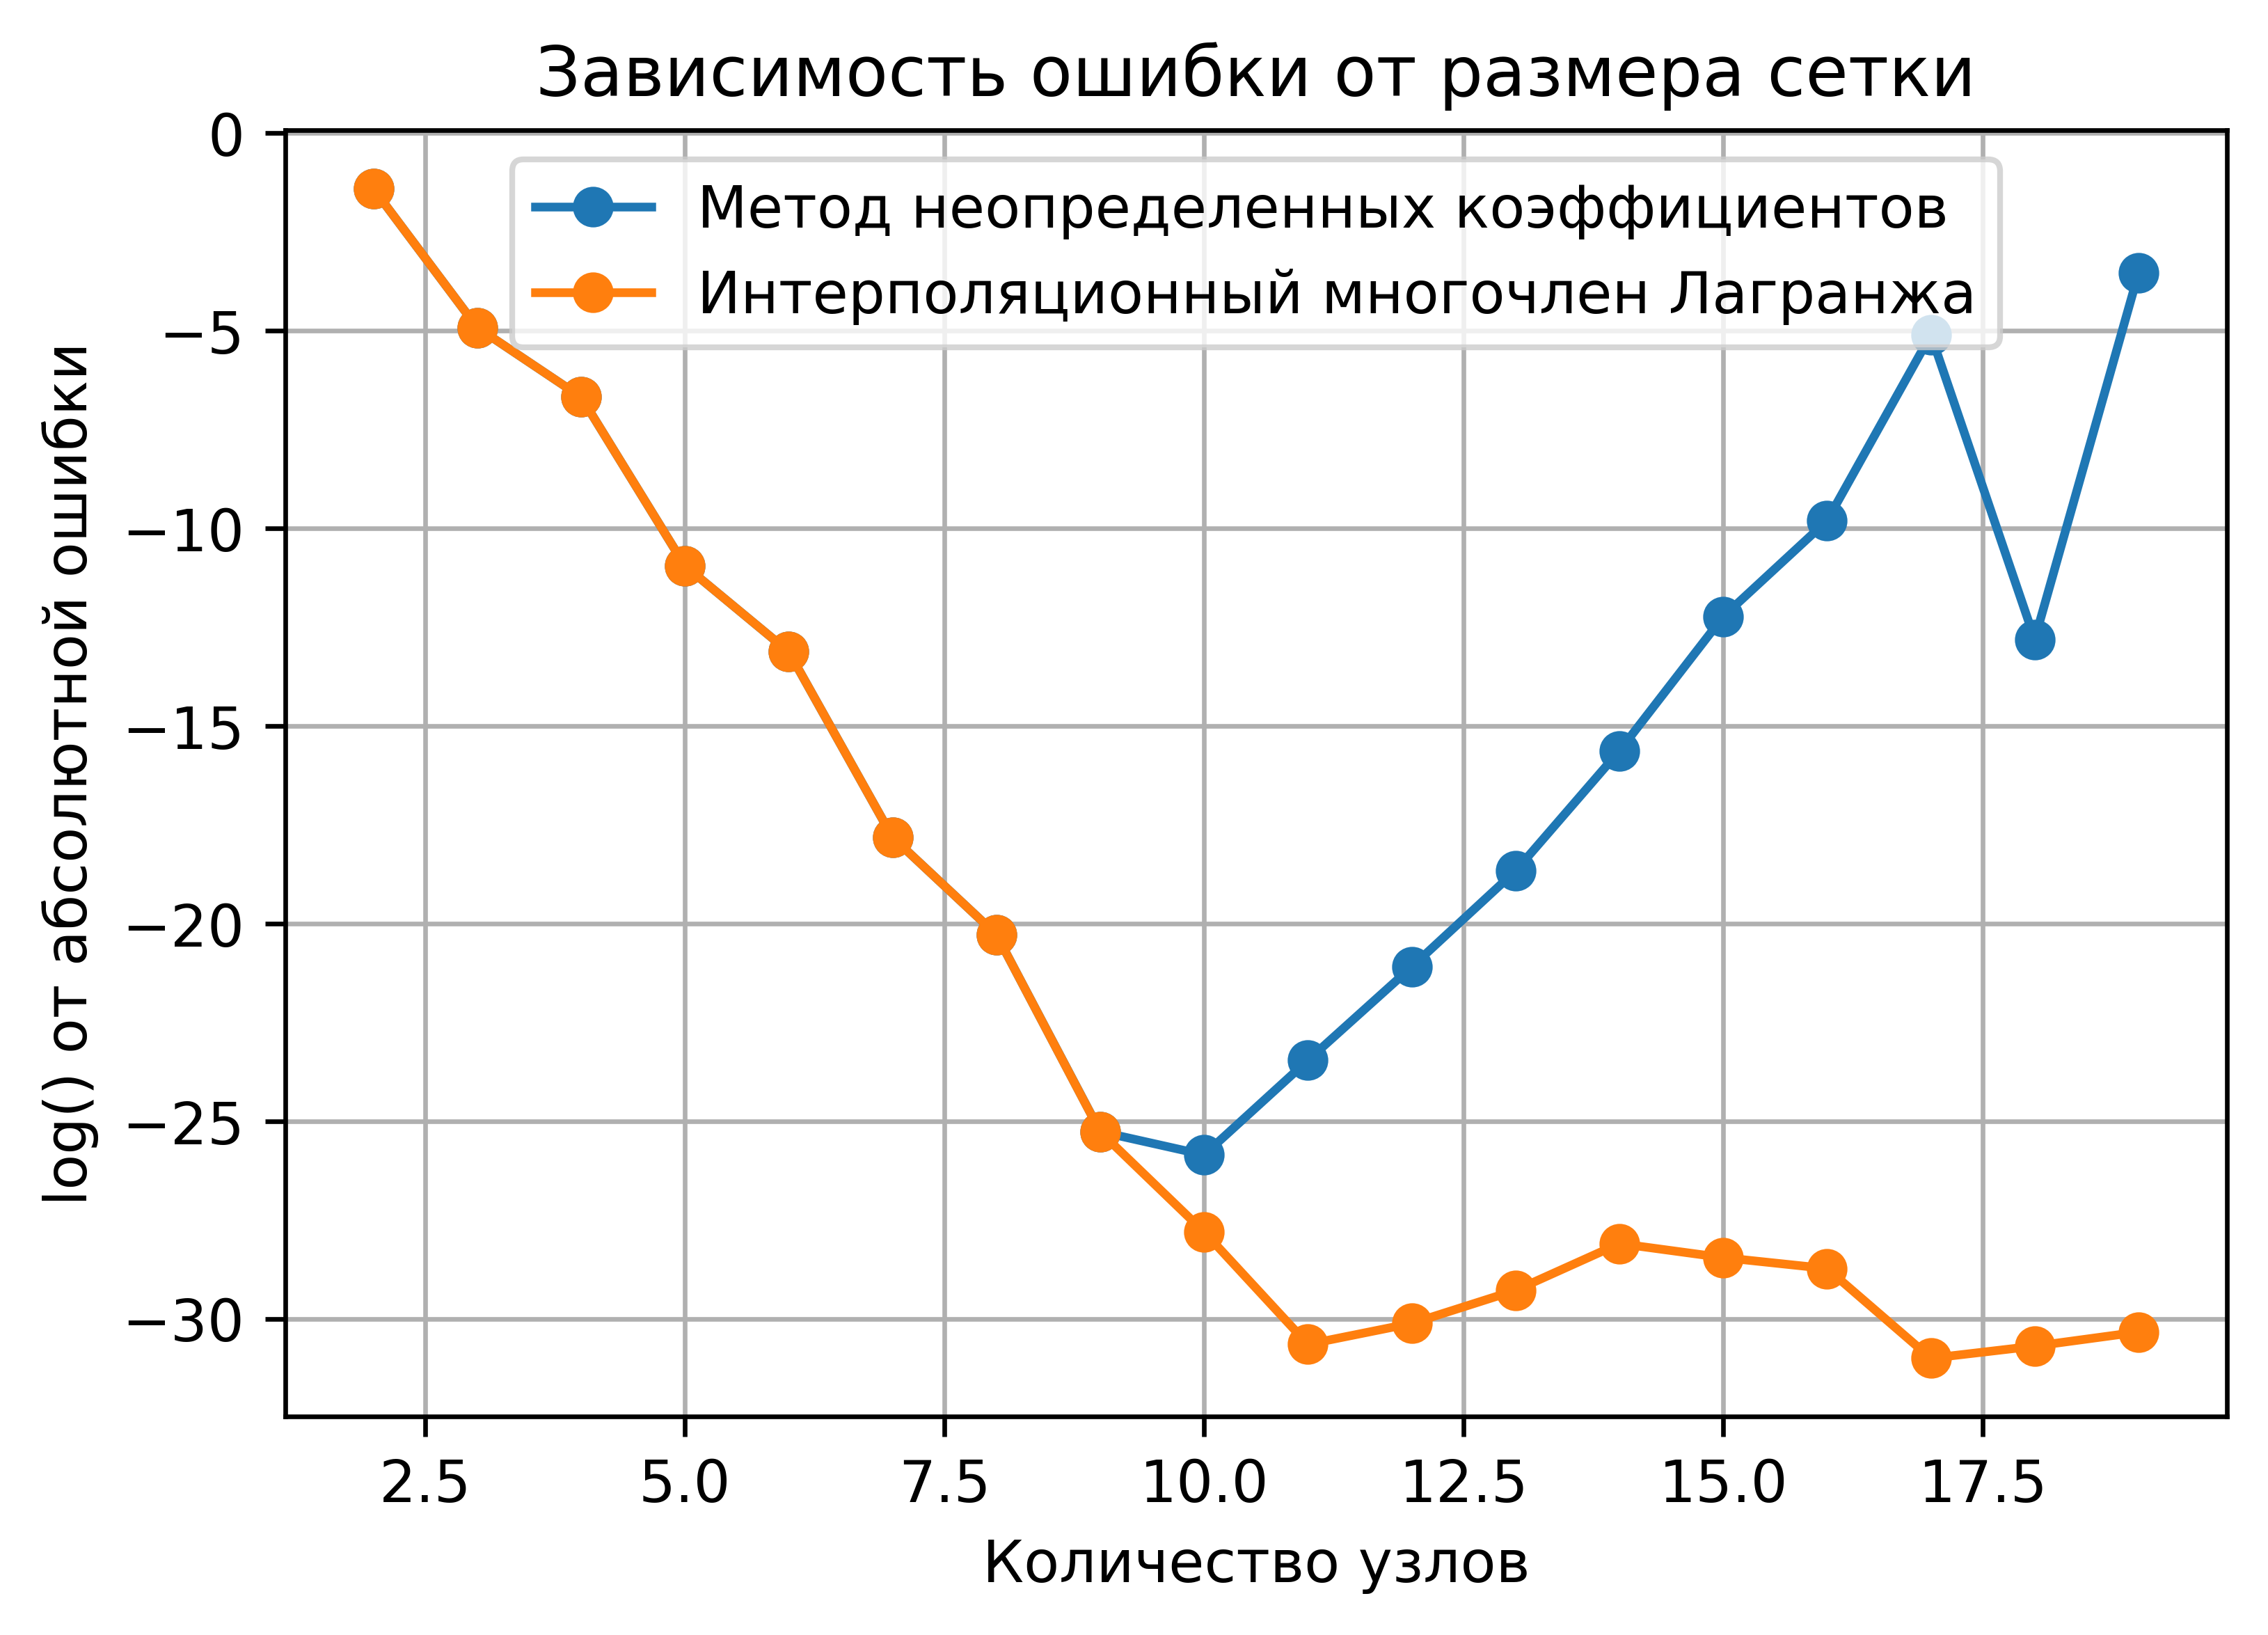

In [8]:
def get_diff_2(x, f, n):
    A = np.fliplr(np.vander(x, x.size))
    alpha = la.solve(A,f)
    diff = 0
    for i in range(1, x.size):
        diff += i*alpha[i]*x[n]**(i-1)
    return diff

a = np.pi/3
b = np.pi/2
N_pol = [i for i in range(2, 20)]
Err_pol = np.zeros(len(N_pol))

for n in range(2, 20):
    p = n - 1
    h = (b - a) / p
    x = np.linspace(a, b, p+1)
    f = np.sin(x)
    Err_pol[n - 2] = abs(get_diff_2(x, f, 0) - 0.5)

plt.figure(figsize=(6, 4), dpi=600)
plt.grid()
plt.title("Зависимость ошибки от размера сетки")
plt.xlabel("Количество узлов")
plt.ylabel("log() от абсолютной ошибки")

plt.plot(N, np.log(Err), marker='o', label='Метод неопределенных коэффициентов')
plt.plot(N_pol, np.log(Err_pol), marker='o', label='Интерполяционный многочлен Лагранжа')

plt.legend()
plt.savefig('3.png')